In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df_train = pd.read_csv("/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv",index_col='ID')
df_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [4]:
low_corr_col = ['Area' , 'AspectRation' , 'Extent' , 'Solidity' , 'roundness', 'ShapeFactor4']

In [5]:
df_test = pd.read_csv("/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv",index_col='ID')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 10834 to 13542
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2709 non-null   int64  
 1   Perimeter        2709 non-null   float64
 2   MajorAxisLength  2709 non-null   float64
 3   MinorAxisLength  2709 non-null   float64
 4   AspectRation     2709 non-null   float64
 5   Eccentricity     2709 non-null   float64
 6   ConvexArea       2709 non-null   int64  
 7   EquivDiameter    2709 non-null   float64
 8   Extent           2709 non-null   float64
 9   Solidity         2709 non-null   float64
 10  roundness        2709 non-null   float64
 11  Compactness      2709 non-null   float64
 12  ShapeFactor1     2709 non-null   float64
 13  ShapeFactor2     2709 non-null   float64
 14  ShapeFactor3     2709 non-null   float64
 15  ShapeFactor4     2709 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 359.8 KB


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train[low_corr_col])


StandardScaler()

In [7]:
def scaling(dataset):
    df_num = dataset[low_corr_col]
    df_numerical = scaler.transform(df_num)

    df_num = pd.DataFrame(df_numerical,columns=df_num.columns,index=dataset.index)

    dataset.drop(columns=low_corr_col,inplace=True)
    return pd.concat([dataset,df_num],axis=1)
def gs(X):
    Q, R = np.linalg.qr(X)
    return Q

In [8]:
processed_df_train = scaling(df_train)
processed_df_test = scaling(df_test)
processed_df_train.head()

,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,y,Area,AspectRation,Extent,Solidity,roundness,ShapeFactor4
ID,,,,,,,,,,,,,,,,,
0,971.303,397.202654,186.945510,0.882317,58977,272.306674,0.685561,0.006820,0.000929,0.469994,HOROZ,0.174073,2.224308,-2.966134,0.068758,-1.650182,0.815760
1,757.601,265.590470,213.967453,0.592420,44780,238.071960,0.896387,0.005966,0.002376,0.803510,SEKER,-0.290465,-1.391835,0.445540,1.498190,1.701569,0.531237
2,653.783,239.902428,168.421505,0.712136,32034,200.781748,0.836931,0.007577,0.002293,0.700453,DERMASON,-0.725552,-0.642144,1.051566,0.267127,0.964020,0.616586
3,734.020,268.446281,184.061923,0.727925,39208,222.201897,0.827733,0.006923,0.002005,0.685142,DERMASON,-0.484668,-0.502811,0.330964,0.406669,0.518910,0.967898
4,775.403,281.212824,193.236878,0.726511,43028,232.703412,0.827499,0.006612,0.001912,0.684755,SIRA,-0.357659,-0.515832,-0.411095,0.275515,0.256953,0.330810


In [9]:
from sklearn.model_selection import train_test_split

X = processed_df_train.drop(columns=['y'])[low_corr_col]
y = processed_df_train.y
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Support Vector Machines
from sklearn.metrics import f1_score
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)

acc_svc = svc.score(X_valid, y_valid)
f1_svc = f1_score(y_valid, y_pred,average='macro')

print('Validation set accuracy: {:2.2}'.format(acc_svc))
print('F1 Score ',f1_svc)

Validation set accuracy: 0.94
F1 Score  0.9476762306297211


In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_valid)

acc_random_forest = random_forest.score(X_valid, y_valid)
f1_random_forest = f1_score(y_valid, y_pred,average='macro')

print('Validation set accuracy: {:2.2}'.format(acc_random_forest))
print('F1 Score ',f1_random_forest)

Validation set accuracy: 0.93
F1 Score  0.9426249905946454


Text(0.5, 1.0, 'features_correlation')

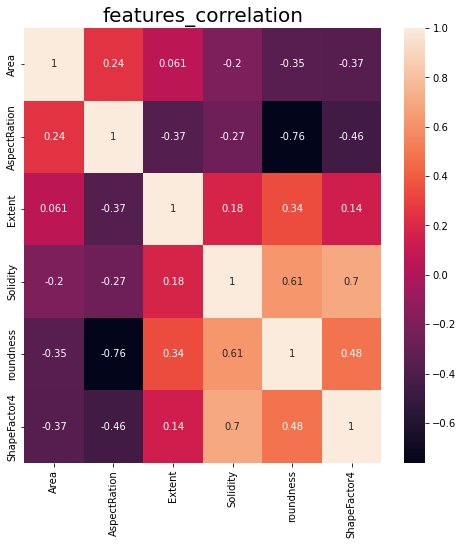

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True)
plt.title("features_correlation",size=20)

In [13]:
col=X.columns
X_=X.to_numpy()
X_=pd.DataFrame(gs(X_),columns=col)
X_train_ortho, X_valid_ortho, y_train_ortho, y_valid_ortho = train_test_split(X_, y, test_size=0.2, random_state=42, stratify=y)

Text(0.5, 1.0, 'features_correlation')

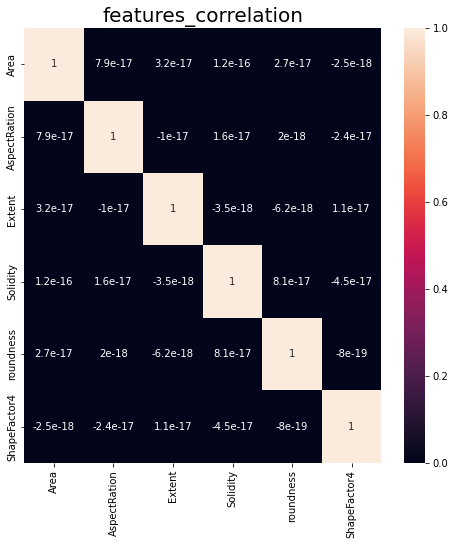

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(X_.corr(),annot=True)
plt.title("features_correlation",size=20)

In [15]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6]
        }

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 4
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_micro', n_jobs=4, cv=skf, verbose=3, random_state=1001 )

In [17]:
random_search.fit(X_train_ortho,y_train_ortho)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.9min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:10] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:34:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1001, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=Non...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsampl

In [18]:
predicted_y = random_search.predict(X_valid_ortho)
print(metrics.classification_report(y_valid_ortho, predicted_y))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       211
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.92      0.96      0.94       261
    DERMASON       0.91      0.94      0.93       567
       HOROZ       0.98      0.96      0.97       298
       SEKER       0.97      0.95      0.96       324
        SIRA       0.89      0.87      0.88       422

    accuracy                           0.93      2167
   macro avg       0.95      0.94      0.94      2167
weighted avg       0.93      0.93      0.93      2167



In [19]:
from sklearn.metrics import f1_score
f1_score(y_valid_ortho, predicted_y,average='macro')

0.9430874798638244

In [20]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Random Forest',random_forest ),
               ('SVC',svc),
               ('ْRandom Search', random_search)]

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_valid)
f1_score(y_valid, y_pred,average='macro')

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.8min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:25] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:37:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.945200565187423

In [21]:
vc.fit(X,y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] subsample=0.6, min_child_weight=1, max_depth=4, gamma=0.5, colsample_bytree=0.8 
[00:31:17] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:31:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, min_child_weight=1, max_depth=4, gamma=0.5, colsample_bytree=0.8, score=0.935, total=  28.5s
[CV] subsample=0.8, min_child_weight=10, max_depth=6, gamma=1.5, colsample_bytree=0.8 
[00:31:46] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } mig

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  3.6min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:25] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:41:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                             ('SVC', SVC()),
                             ('ْRandom Search',
                              RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1001, shuffle=True),
                                                 estimator=XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         gamma=None,
                                                                         gpu_id=None,
                                                                         importanc

In [22]:
X_test = processed_df_test.copy()[low_corr_col]
X_test.head()

,Area,AspectRation,Extent,Solidity,roundness,ShapeFactor4
ID,,,,,,
10834,0.154473,1.599513,-2.638544,-6.305719,-1.346652,-7.477150
10835,-0.823382,-0.574426,0.357962,0.142754,0.611149,0.667327
10836,0.053530,-0.888612,0.062835,-1.793040,-0.771590,0.121812
10837,-0.956924,-0.540199,-0.682977,0.247522,0.998036,0.816097
10838,3.004427,-0.278990,1.117147,0.024156,-0.091121,-0.761699


Text(0.5, 1.0, 'features_correlation')

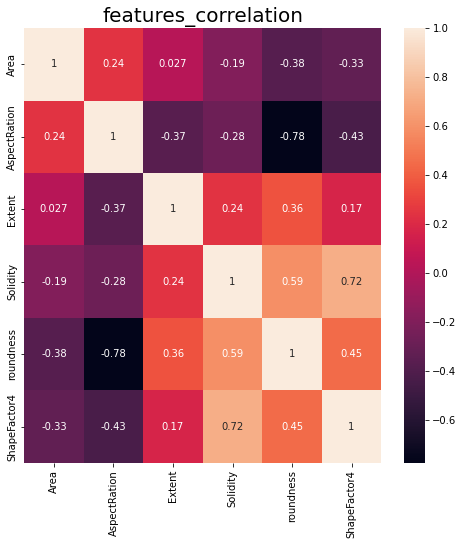

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test.corr(),annot=True)
plt.title("features_correlation",size=20)

In [24]:
predictions = vc.predict(X_test)
X_test['ID'] = X_test.index

In [25]:
output = pd.DataFrame({'ID': X_test.ID, 'y': predictions})
output.to_csv('my_submission.csv', index=False)
print("success")

success
